# Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

Here we are categorizing and identifying the countries that are in dire need of aid using some socio-economic and health factors that determine the overall development of the country. And will be suggesting the countries which the CEO needs to focus on the most.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# 1. Read and Inspect the data

In [2]:
# read the dataset
Countries = pd.read_csv("D:\\upGrad\\DS\\Assignments\\Assignment-4\\Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
Countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Check the number of rows and columns in the dataframe
Countries.shape

(167, 10)

In [4]:
# Check the column-wise info of the dataframe
Countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# Check the summary for the numeric columns 
Countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# 2. Cleaning the data

In [6]:
# missing values
round(100*(Countries.isnull().sum())/len(Countries), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

We have not found any missing values. so we will not do any missing value treatment.

In [7]:
#Converting values of import, export and health into their actual values as it is given in percentage of GDP.
Countries['exports'] = (Countries['exports']/100)*Countries['gdpp']
Countries['imports'] = (Countries['imports']/100)*Countries['gdpp']
Countries['health'] = (Countries['health']/100)*Countries['gdpp']
Countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [8]:
Countries.shape

(167, 10)

In [9]:
Countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


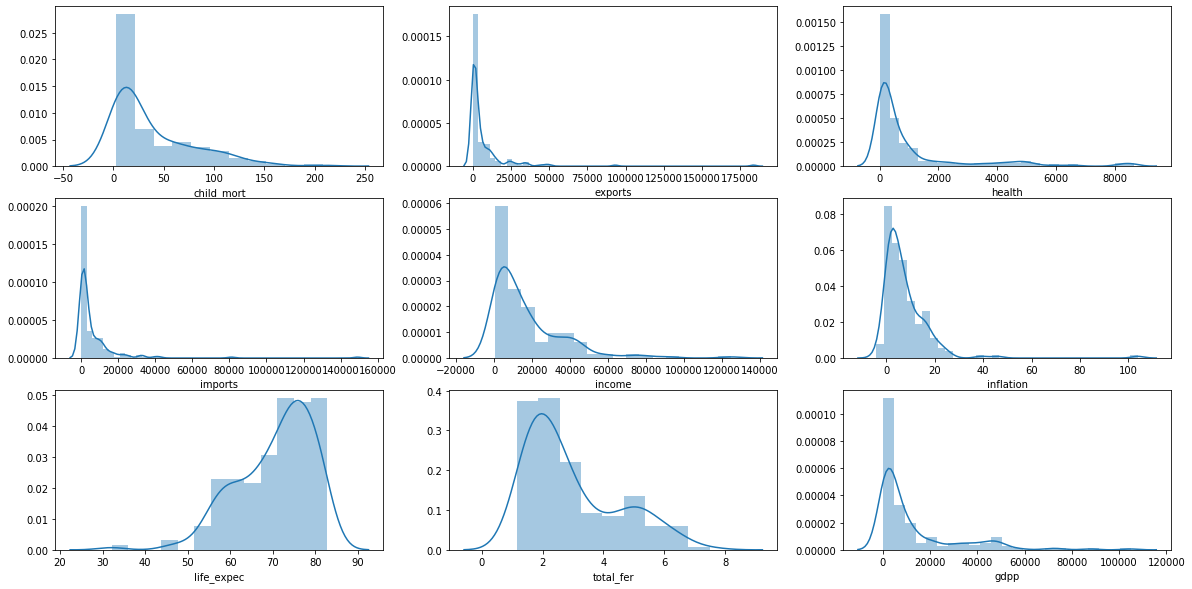

In [10]:
#Visualizing data
plt.figure(figsize = (20,10))
f = Countries.columns[1:]
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(Countries[i[1]])

In the above plot we can see that the variable child_mort has a peak in the initial values. similarly the same pattern follows in the case of variables exports, health and imports as well as inflation. For the variable income there is some pattern as the trend line is high in the range 0 to 20000 and then increased and again there is a small peak for the range 30000 to 40000. We can observe the similar pattern in the variable total_fer as well as gdpp. The variable life_expec has the opposite pattern initially the values are bit lower and increased gradually.

# Univariate Analysis

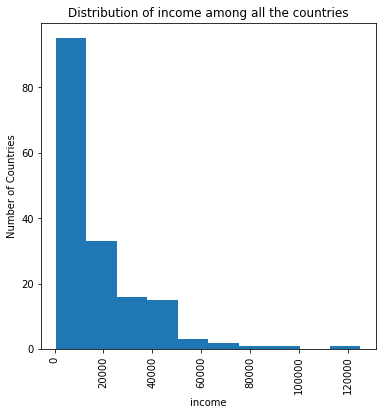

In [11]:
#plotting Histplot for the income variable 
plt.figure(figsize=(6,6))
plt.hist(Countries.income)
plt.ticklabel_format(style='plain', axis='x')
plt.title("Distribution of income among all the countries")
plt.xlabel("income")
plt.ylabel("Number of Countries")
plt.xticks(rotation=90)
plt.show()

Maximum number of countries have people with net income per person less than 20000. Very few countries cross 100000 net income per person.

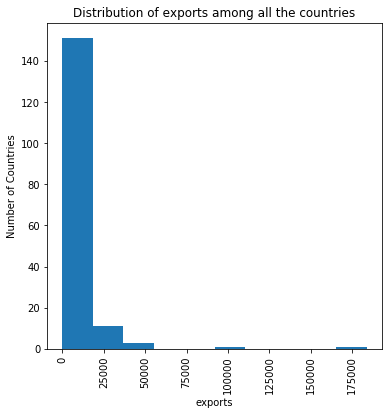

In [12]:
#plotting Histplot for the exports variable 
plt.figure(figsize=(6,6))
plt.hist(Countries.exports)
plt.ticklabel_format(style='plain', axis='x')
plt.title("Distribution of exports among all the countries")
plt.xlabel("exports")
plt.ylabel("Number of Countries")
plt.xticks(rotation=90)
plt.show()

Over 160 countries does 25000000 exports of goods and services. Only few countries are likely to fall under the range of 175000000 to 200000000m

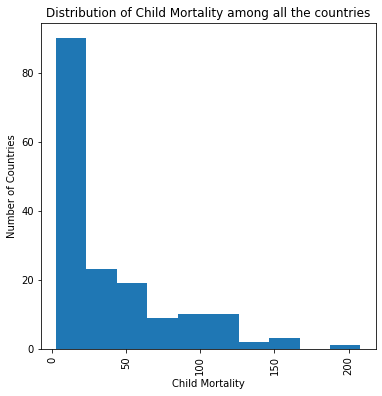

In [13]:
#plotting Histplot for the inflation variable 
plt.figure(figsize=(6,6))
plt.hist(Countries.child_mort)
plt.ticklabel_format(style='plain', axis='x')
plt.title("Distribution of Child Mortality among all the countries")
plt.xlabel("Child Mortality")
plt.ylabel("Number of Countries")
plt.xticks(rotation=90)
plt.show()

More than 80 countries have child mortality of approximately 20 that means 20 deaths of children under 5 years of age per 1000 live births

# Bivariate Analysis

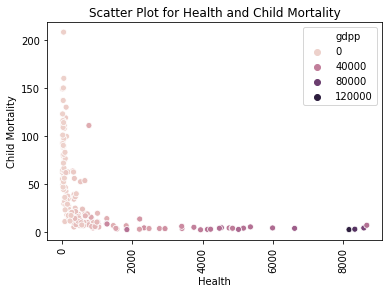

In [14]:
#plotting scatter plot for child_mort and health

a = sns.scatterplot(Countries.health, Countries.child_mort,hue= Countries.gdpp)

plt.title("Scatter Plot for Health and Child Mortality")
plt.xlabel('Health', fontsize=10)
plt.ylabel('Child Mortality', fontsize=10)
plt.xticks(rotation=90)
plt.show()

Countries spending more on health have less child mortality and vice versa.

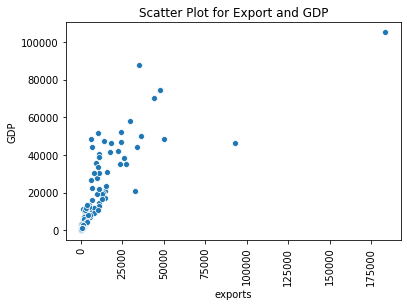

In [15]:
#plotting scatter plot for exports and gdpp

a = sns.scatterplot(Countries.exports, Countries.gdpp)

plt.title("Scatter Plot for Export and GDP")
plt.xlabel('exports', fontsize=10)
plt.ylabel('GDP', fontsize=10)
plt.xticks(rotation=90)
plt.show()

Those countries which exports more goods and services have higher GDP.

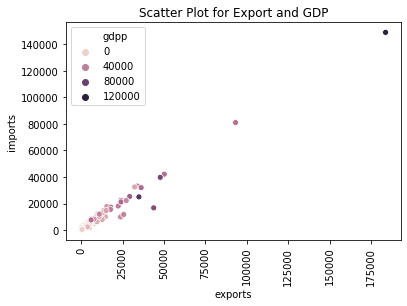

In [16]:
#plotting scatter plot for exports and imports

a = sns.scatterplot(Countries.exports, Countries.imports, hue=Countries.gdpp)

plt.title("Scatter Plot for Export and GDP")
plt.xlabel('exports', fontsize=10)
plt.ylabel('imports', fontsize=10)
plt.xticks(rotation=90)
plt.show()

Countries having higher exports than imports have better GDP.


# 4. Outlier Analysis

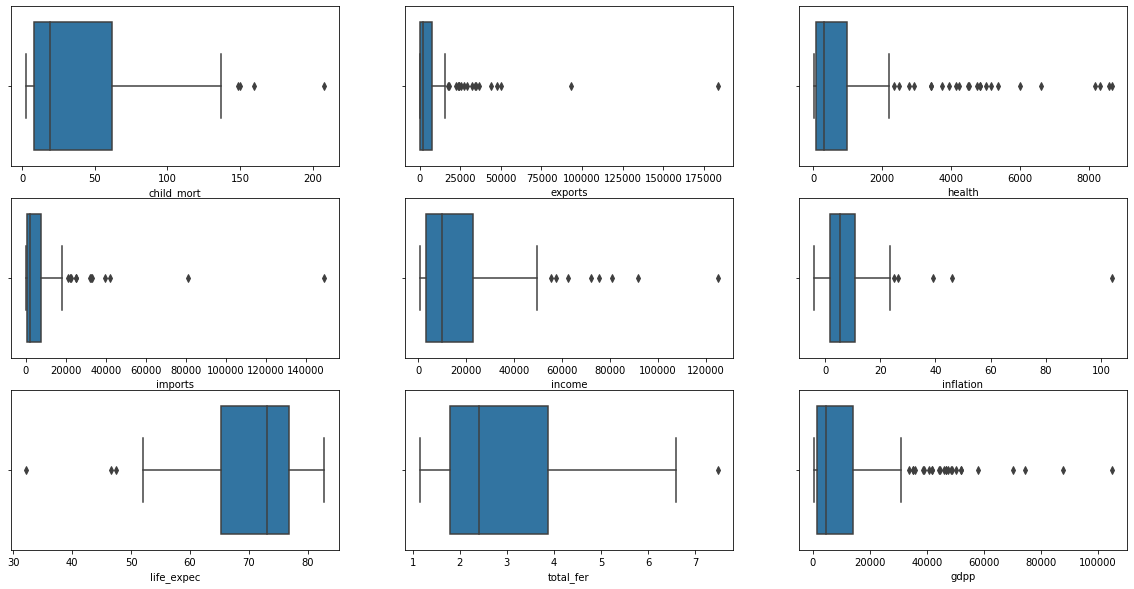

In [17]:
plt.figure(figsize = (20,10))
f = Countries.columns[1:]
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(Countries[i[1]])

The variables child_mort and inflation have some upper outliers which are significant for our analysis so we will not treat the outliers in these two cases. Whereas remaining all the variables have upper outliers which are insignificant for our data analysis and may cause unwanted errors so here we will do soft capping of these variables.

## Outlier Treatment

In [18]:
#Treating outliers for exports variable
q1 = Countries['exports'].quantile(.95)
Countries['exports'][Countries['exports']>q1] = q1

In [19]:
#Treating outliers for health variable
q2 = Countries['health'].quantile(.95)
Countries['health'][Countries['health']>q2] = q2

In [20]:
#Treating outliers for imports variable
q3 = Countries['imports'].quantile(.95)
Countries['imports'][Countries['imports']>q3] = q3

In [21]:
#Treating outliers for income variable
q4 = Countries['income'].quantile(.95)
Countries['income'][Countries['income']>q4] = q4

In [22]:
#Treating outliers for life_expec variable
q5 = Countries['life_expec'].quantile(.95)
Countries['life_expec'][Countries['life_expec']>q5] = q5

In [23]:
#Treating outliers for total_fer variable
q6 = Countries['total_fer'].quantile(.95)
Countries['total_fer'][Countries['total_fer']>q6] = q6

In [24]:
#Treating outliers for gdpp variable
q7 = Countries['gdpp'].quantile(.95)
Countries['gdpp'][Countries['gdpp']>q7] = q7

# 5. Hopkins Statistics

In [25]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [26]:
hopkins(Countries.drop("country", axis=1))

0.9301437687904931

Since the value of hopkins statistic is above 0.7, it has a high tendency to cluster.

# 6. Scaling the variables

In [27]:

from sklearn.preprocessing import StandardScaler

# instantiate
scaler = StandardScaler()

# fit_transform
Countries_scaled = scaler.fit_transform(Countries.drop('country', axis = 1))
Countries_scaled.shape

(167, 9)

In [28]:
Countries_scaled = pd.DataFrame(Countries_scaled)
Countries_scaled.columns = Countries.columns[1:]
Countries_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.669581,-0.629435,-0.732729,-0.958349,0.157336,-1.623180,2.016421,-0.757362
1,-0.538949,-0.542172,-0.473489,-0.472182,-0.394006,-0.312347,0.654823,-0.880535,-0.523321
2,-0.272833,-0.475838,-0.530017,-0.560152,-0.192552,0.789274,0.677490,-0.019090,-0.498838
3,2.007808,-0.418960,-0.588935,-0.543087,-0.667360,1.387054,-1.181180,2.044904,-0.560376
4,-0.695634,-0.027134,-0.150685,0.306422,0.227992,-0.601749,0.711490,-0.547072,0.013312


# 7. Modelling using K-Means Clustering

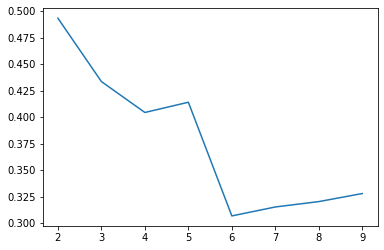

In [29]:
# Silhouette Analysis

from sklearn.metrics import silhouette_score
ss = []
for k in range(2,10):
    kmean = KMeans(n_clusters = k).fit(Countries_scaled)
    ss.append([k, silhouette_score(Countries_scaled, kmean.labels_)])

sil =pd.DataFrame(ss)
plt.plot(sil[0], sil[1])
plt.show()

In [30]:
sil

,0,1
0,2,0.493328
1,3,0.433643
2,4,0.404472
3,5,0.414127
4,6,0.306940
5,7,0.315371
6,8,0.320442
7,9,0.328044


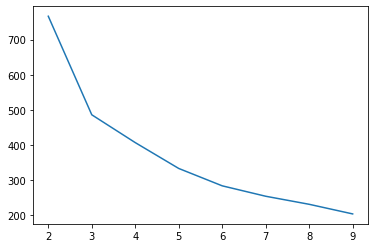

In [31]:
## Elbow Cuve
ssd = []
for k in range(2,10):
    kmean = KMeans(n_clusters = k)
    kmean.fit(Countries_scaled)
    ssd.append([k, kmean.inertia_])
    
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])
plt.show()

# Final model with K-Means with K=3

In [32]:
# final model with k=3
kmean = KMeans(n_clusters= 3 , random_state = 0)
kmean.fit(Countries_scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [33]:
kmean.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [34]:
# assigning the label
Countries["cluster_id"] = kmean.labels_
Countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,5.861,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200,0


In [35]:
#Check number of clusters in each datapoint
Countries.cluster_id.value_counts()

0    82
1    48
2    37
Name: cluster_id, dtype: int64

# Visualizing the Clusters

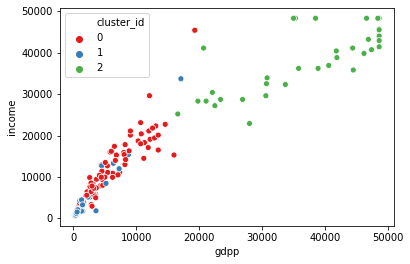

In [36]:
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_id', data = Countries, palette ='Set1')
plt.show()

From above scatter plot it is clearly visible that cluster 0 has countries with low net income per person and low GDP, cluster 1 has average net income per person and GDP and cluster 2 has the countries with highest net income person and GDP as well. 

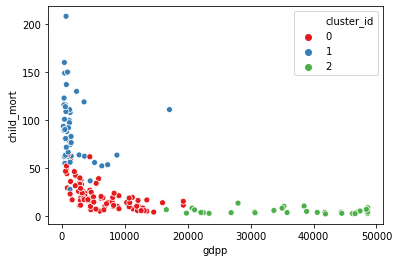

In [37]:
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_id', data = Countries, palette ='Set1')
plt.show()

From the above plot it is clearly visible that highest child mortality and lowest GDP and vice versa in cluster 2 whereas cluster 1 has average child mortality as well as GDP.

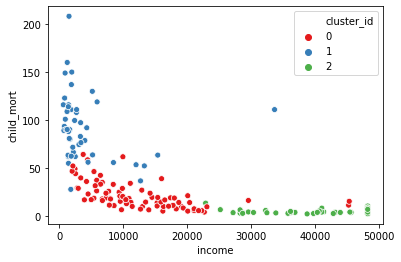

In [38]:
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'cluster_id', data = Countries, palette ='Set1')
plt.show()

From the above scatterplot it is visible that cluster 0 has countries with highest child mortality and lowest income and vice versa in cluster 2 whereas cluster 1 has countries with average net income per person.

# Cluster Profiling

In [39]:
new_df = Countries[['income', 'child_mort', 'gdpp', 'cluster_id']].groupby('cluster_id').mean()
new_df

,income,child_mort,gdpp
cluster_id,,,
0,12304.756098,21.951220,6287.463415
1,3897.354167,91.610417,1909.208333
2,38711.081081,5.237838,37745.675676


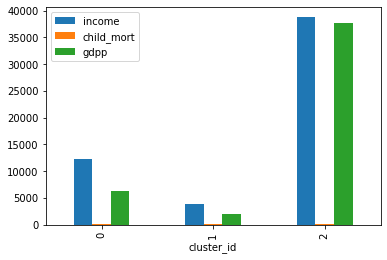

In [40]:
new_df.plot(kind="bar")
plt.show()

Cluster 1 is cluster where we have low gdpp, high child mortality and low income.

In [41]:
# Filtering data for Cluster 1
C1 = Countries[Countries["cluster_id"]==1]
C1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.820,553,1
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,5.861,3530,1
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.360,758,1
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.880,6350,1
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.861,575,1


In [42]:
C1 = C1.sort_values(by = ['gdpp','child_mort', 'income'], ascending = [True, False, True]).head()

In [43]:
# top  countries which are in dire need of aid
C1["country"].head()

26              Burundi
88              Liberia
37     Congo, Dem. Rep.
112               Niger
132        Sierra Leone
Name: country, dtype: object

# Differentiating the Clusters

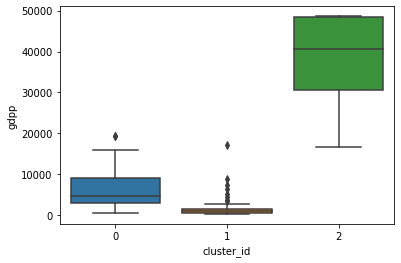

In [44]:
# Boxplot for variable "gdpp"
sns.boxplot(x='cluster_id', y='gdpp', data = Countries)
plt.show()

From the above boxplot it is clearly visinble that countries falling under the cluster 1 has lowest GDP where as the countries in the cluster 2 has the highest and 0 with average GDP

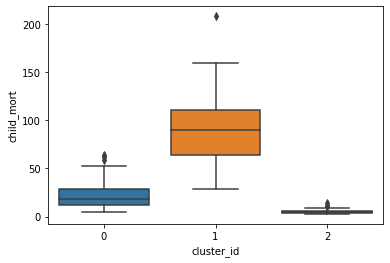

In [45]:
# Boxplot for variable "child_mort"
sns.boxplot(x='cluster_id', y='child_mort', data = Countries)
plt.show()

From the above boxplot it is clearly visinble that countries falling under the cluster 1 has highest chil mortality where as the countries in the cluster 2 has the lowest and 0 with average child mortality respectively.

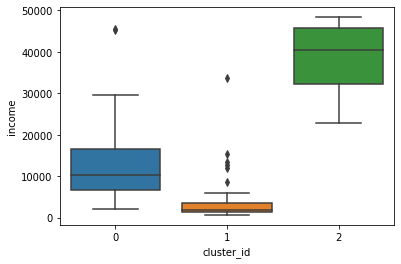

In [46]:
# Boxplot for variable "income"
sns.boxplot(x='cluster_id', y='income', data = Countries)
plt.show()

From the above boxplot it is clearly visinble that countries falling under the cluster 1 has lowest net income per person where as the countries in the cluster 2 has the highest and 0 with average net income per person repectively.

# 8. Hierarchical Clustering

In [47]:
# Print scaled data
Countries_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.669581,-0.629435,-0.732729,-0.958349,0.157336,-1.623180,2.016421,-0.757362
1,-0.538949,-0.542172,-0.473489,-0.472182,-0.394006,-0.312347,0.654823,-0.880535,-0.523321
2,-0.272833,-0.475838,-0.530017,-0.560152,-0.192552,0.789274,0.677490,-0.019090,-0.498838
3,2.007808,-0.418960,-0.588935,-0.543087,-0.667360,1.387054,-1.181180,2.044904,-0.560376
4,-0.695634,-0.027134,-0.150685,0.306422,0.227992,-0.601749,0.711490,-0.547072,0.013312


In [48]:
# Print original data
Countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,5.861,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200,0


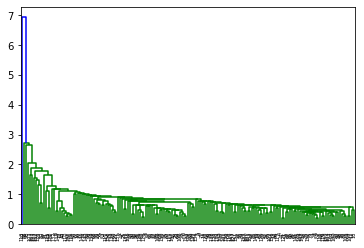

In [49]:
# Perform single linkage
S_Linkage = linkage(Countries_scaled, method="single", metric='euclidean')
dendrogram(S_Linkage)
plt.show()

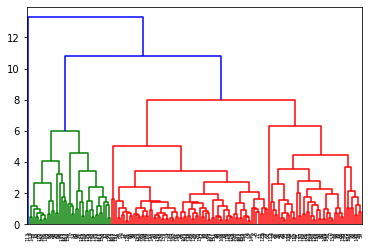

In [50]:
# Perform complete linkage
C_Linkage = linkage(Countries_scaled, method="complete", metric='euclidean')
dendrogram(C_Linkage)
plt.show()

Single linkage doesn't produce a good enough result for us to analyse the clusters. Hence, we will utilise the complete linkage method to analyse the clusters.

In [51]:
# Analyzing clusters with n_clusters = 3
cluster_labels = cut_tree(C_Linkage, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [52]:
# assign cluster labels to original data
Countries['cluster_labels'] = cluster_labels
Countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,5.861,3530,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200,0,0


In [53]:
#Check number of clusters in each datapoint
Countries.cluster_labels.value_counts()

0    125
1     41
2      1
Name: cluster_labels, dtype: int64

# Cluster Profiling

In [54]:
new_df = Countries[['income', 'child_mort', 'gdpp', 'cluster_labels']].groupby('cluster_labels').mean()
new_df

,income,child_mort,gdpp
cluster_labels,,,
0,8396.104000,48.123200,4360.91200
1,38383.170732,5.992683,35520.97561
2,5150.000000,130.000000,2330.00000


Cluster2  is the cluster where we have low gdpp, high child mortality and low income but it has oly one data point so considering cluster 0 as our final cluster.

# Visualizing the Clusters

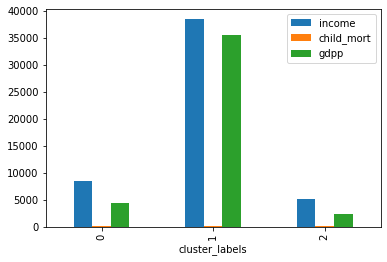

In [55]:
new_df.plot(kind="bar")
plt.show()

In [56]:
# Filtering data for Cluster 2
C0 = Countries[Countries["cluster_labels"]==0]
C0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.820,553,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,5.861,3530,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200,0,0


In [57]:
C0 = C0.sort_values(by = ['gdpp','child_mort', 'income'], ascending = [True, False, True]).head()

In [63]:
# top 5 countries which are in dire need of aid
C0["country"].head()

26              Burundi
88              Liberia
37     Congo, Dem. Rep.
112               Niger
132        Sierra Leone
Name: country, dtype: object

# Differentiating the Clusters

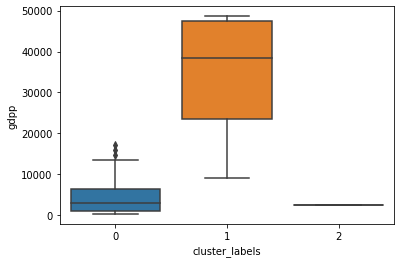

In [59]:
# Boxplots for variable "gdpp"
sns.boxplot(x='cluster_labels', y='gdpp', data=Countries)
plt.show()

From the above boxplot it is clearly visible that countries falling under the cluster 0 has lowest GDP where as the countries in the cluster 2 has the highest and 1 with average GDP respectively.

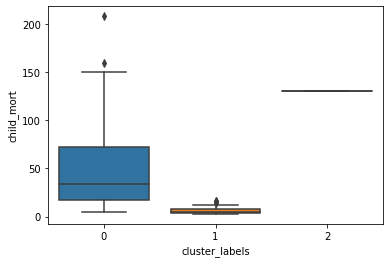

In [60]:
# Boxplots for variable "child_mort"
sns.boxplot(x='cluster_labels', y='child_mort', data=Countries)
plt.show()

From the above boxplot it is clearly visible that countries falling under the cluster 0 has highest child mortality where as the countries in the cluster 2 has the lowest and 1 with average child mortality respectively.

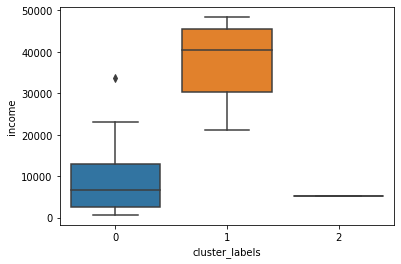

In [61]:
# Boxplots for variable "income"
sns.boxplot(x='cluster_labels', y='income', data=Countries)
plt.show()

From the above boxplot it is clearly visible that countries falling under the cluster 0 has lowest net income per person where as the countries in the cluster 2 has the highest and 1 with average net income per person respectively.